<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch06_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가우시안 나이브 베이즈

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [0]:
# For reproducibility
np.random.seed(1000)

nb_samples = 300

In [0]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

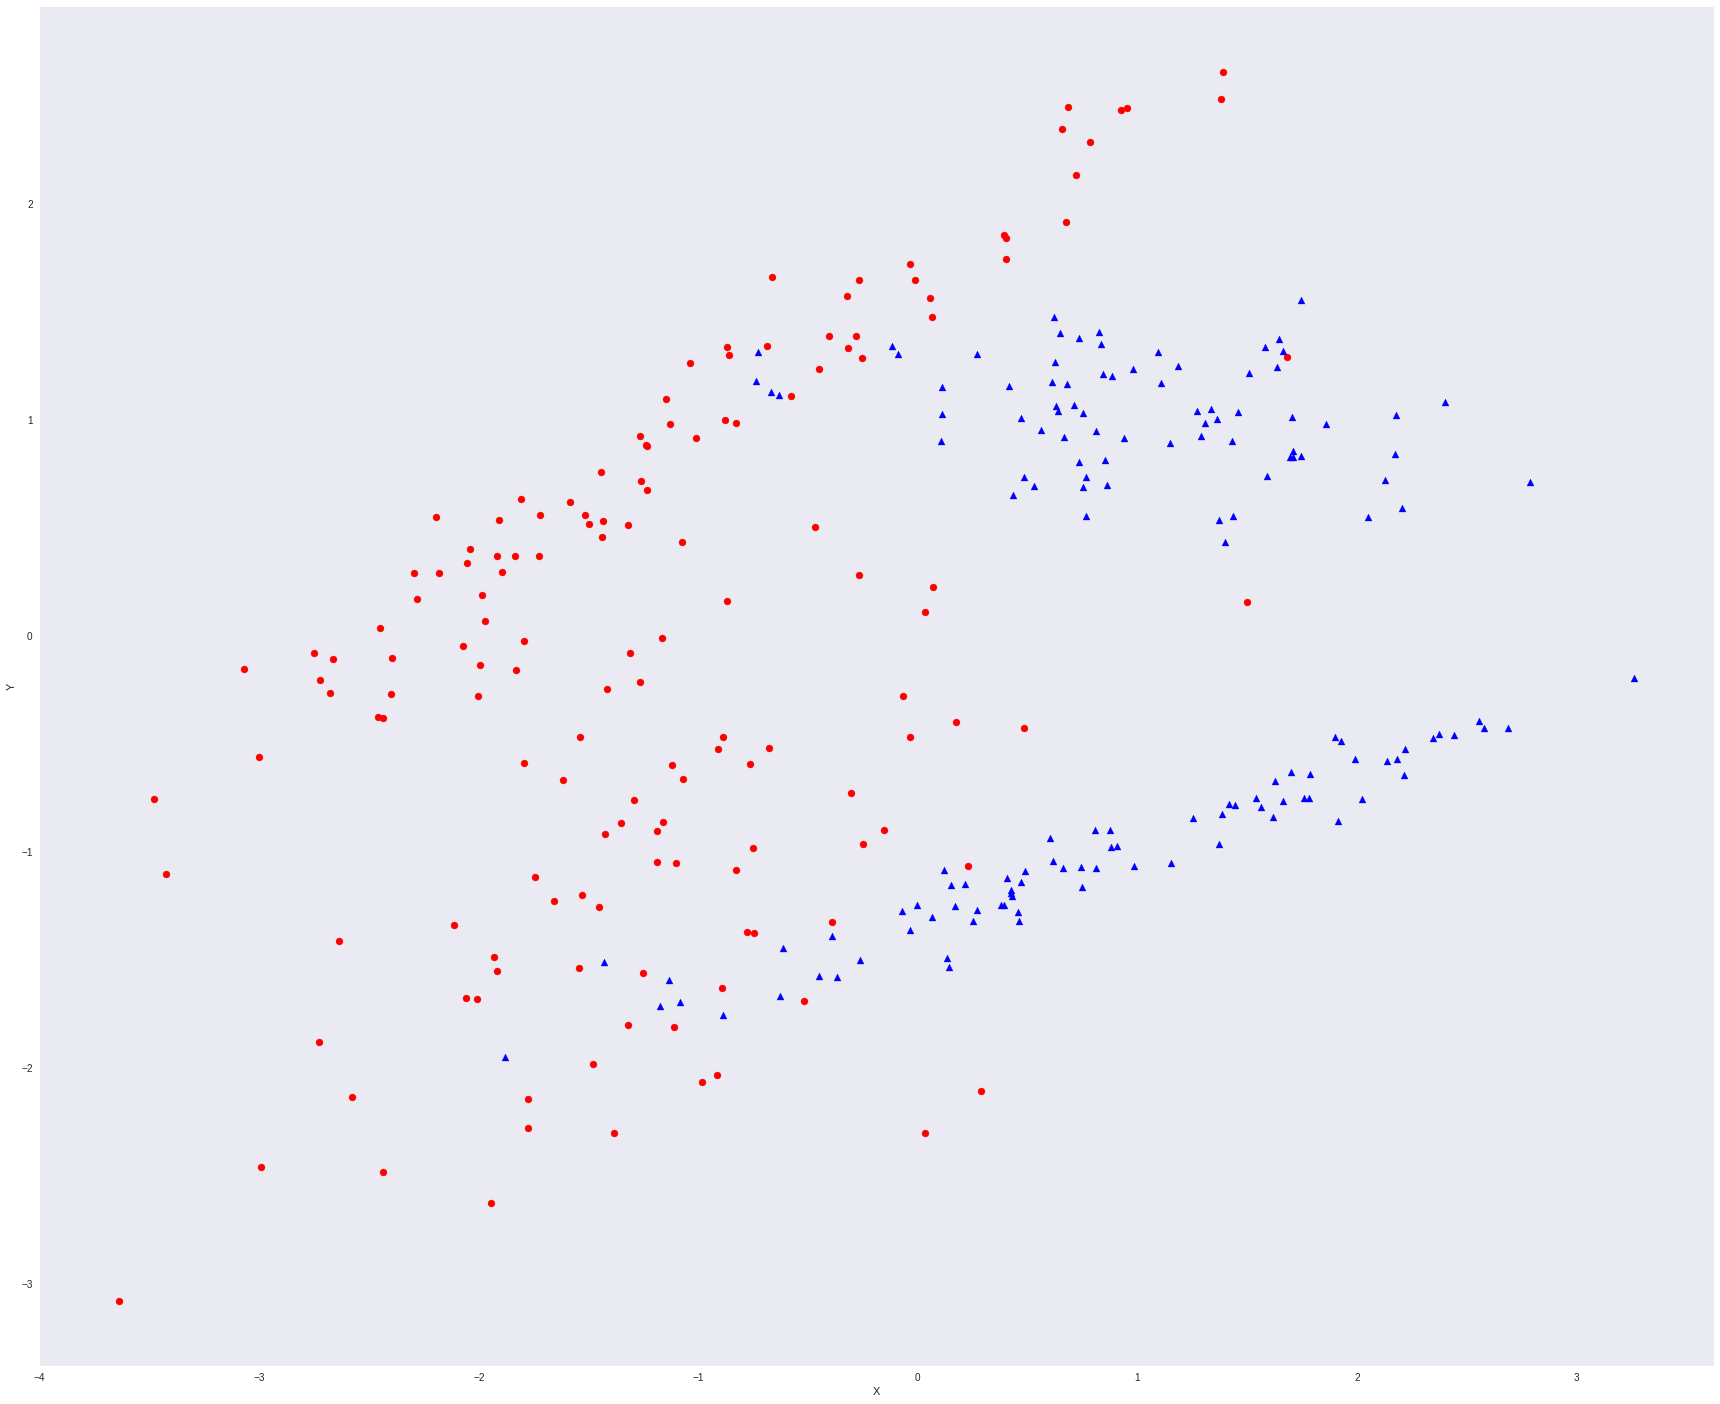

In [19]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

# Show dataset
show_dataset(X, Y)

In [0]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [21]:
 # Create and train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
# Create and train a Logistic regressor (for comparison)
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# Compute ROC Curve
Y_gnb_score = gnb.predict_proba(X_test)
Y_lr_score = lr.decision_function(X_test)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, Y_gnb_score[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, Y_lr_score)

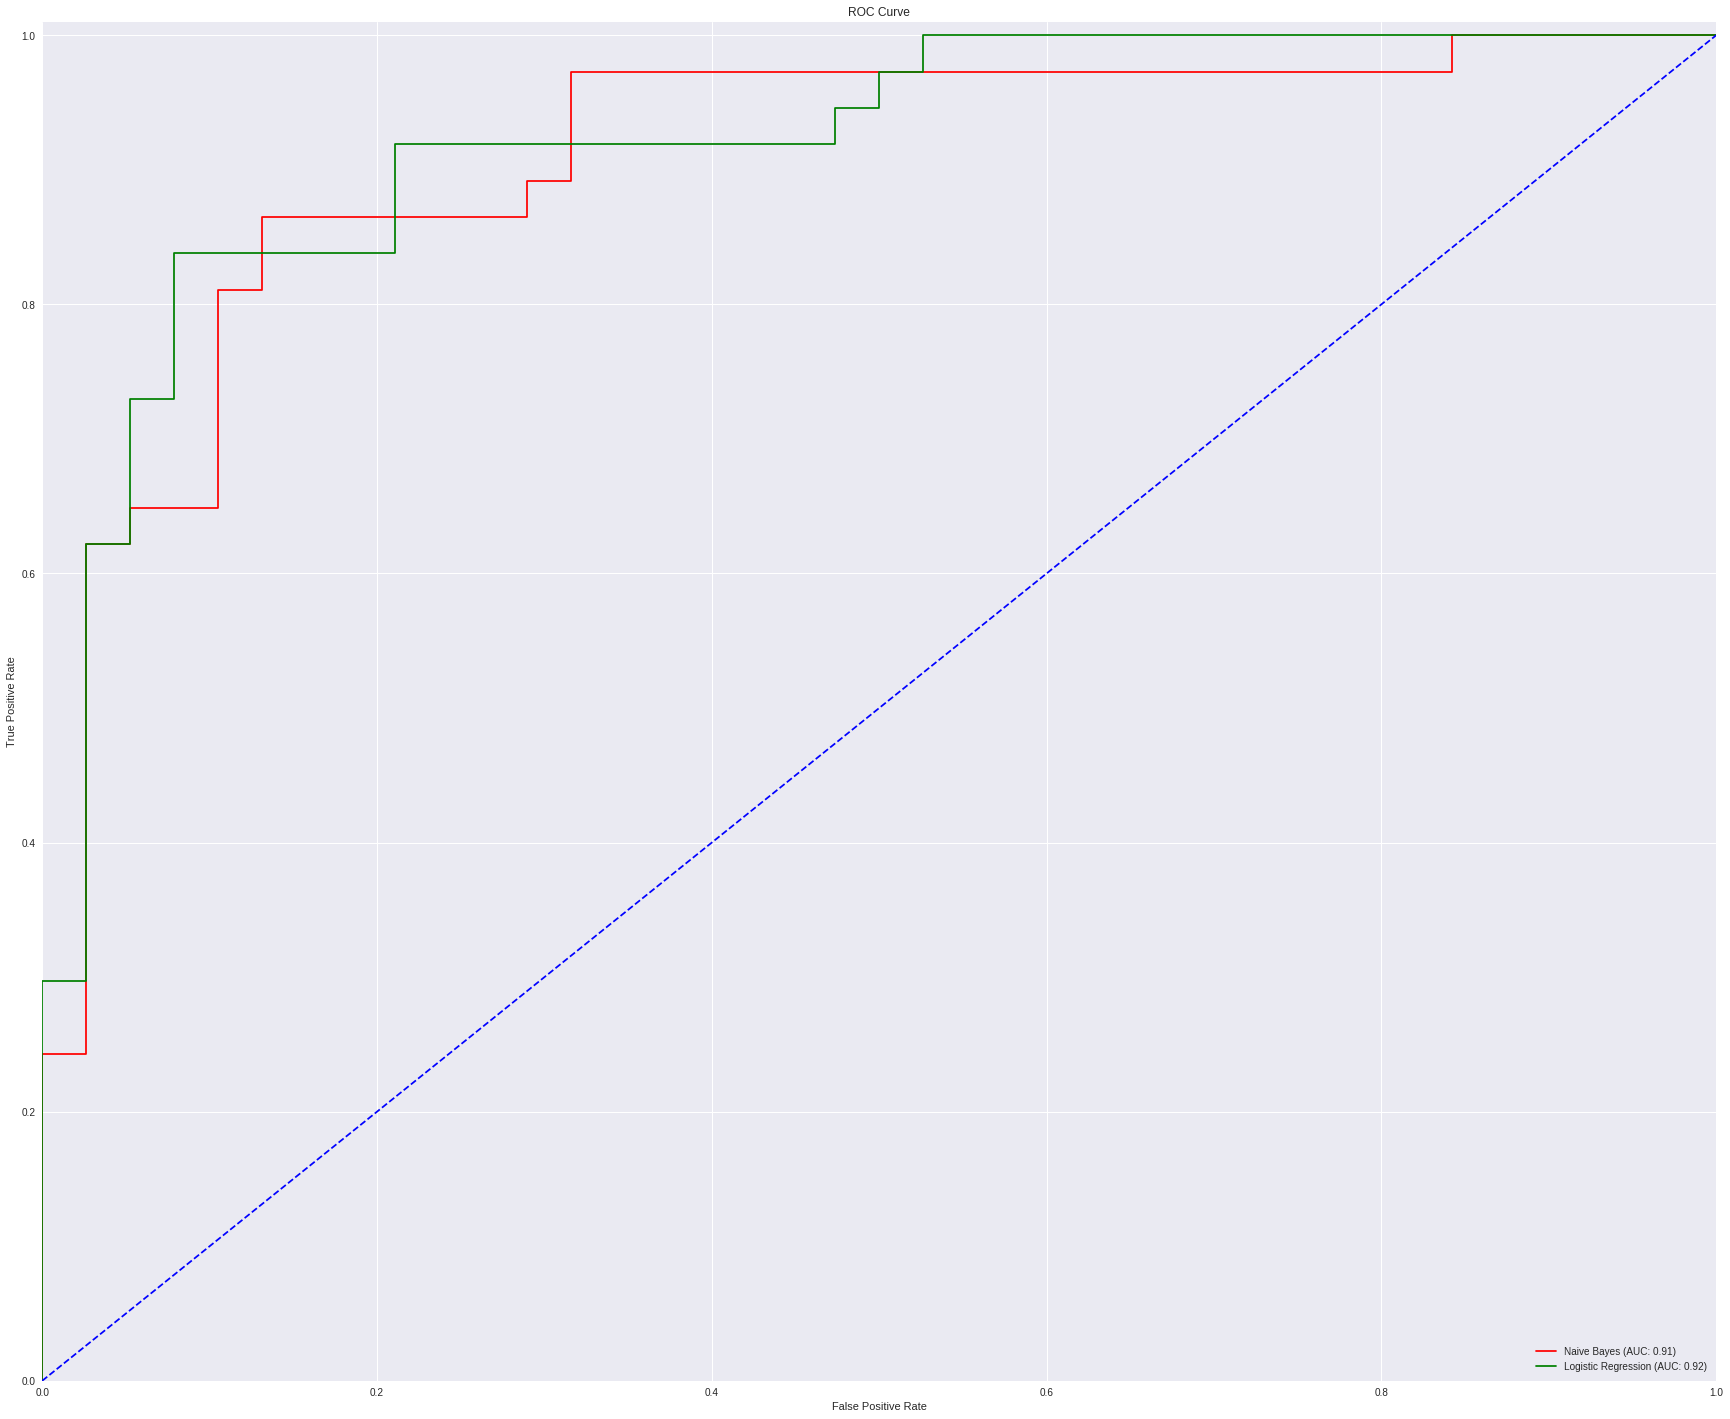

In [25]:
# Plot ROC Curve
plt.figure(figsize=(30, 25))

plt.plot(fpr_gnb, tpr_gnb, color='red', label='Naive Bayes (AUC: %.2f)' % auc(fpr_gnb, tpr_gnb))
plt.plot(fpr_lr, tpr_lr, color='green', label='Logistic Regression (AUC: %.2f)' % auc(fpr_lr, tpr_lr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()